In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from transformers import pipeline
from PIL import Image
import torch
device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU

# Create an image segmentation pipeline with a pre-trained model
segmentation_pipeline = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512",device=device)

# Load an example image (you can also upload your own image later)
image_path = "/kaggle/input/gravats/camion-gravats-2tonnes.jpg"
image = Image.open(image_path)

# Perform segmentation
result = segmentation_pipeline(image)

# Print the result
print(result)

[{'score': None, 'label': 'wall', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979251B0>}, {'score': None, 'label': 'building', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C3197925060>}, {'score': None, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C3197924D60>}, {'score': None, 'label': 'tree', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C3197926D10>}, {'score': None, 'label': 'windowpane', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979BB9A0>}, {'score': None, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979BB8E0>}, {'score': None, 'label': 'earth', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979BBA00>}, {'score': None, 'label': 'door', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979BB9D0>}, {'score': None, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=1024x530 at 0x7C31979BBA30>}, {'score': None, 'label': 'painting

In [5]:
from transformers import pipeline
from PIL import Image
import torch
device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU

# Create an image segmentation pipeline with a pre-trained model
segmentation_pipeline = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512",device=device)

# Load an example image (you can also upload your own image later)
image_path = "/kaggle/input/gravats/evacuation-gravats.jpg"
image = Image.open(image_path)

# Perform segmentation
result = segmentation_pipeline(image)

# Print the result
print(result)

[{'score': None, 'label': 'wall', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5A110>}, {'score': None, 'label': 'building', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5B340>}, {'score': None, 'label': 'tree', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5AE90>}, {'score': None, 'label': 'person', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5B1F0>}, {'score': None, 'label': 'plant', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5AEF0>}, {'score': None, 'label': 'base', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5A1D0>}, {'score': None, 'label': 'fountain', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A5AE60>}, {'score': None, 'label': 'sculpture', 'mask': <PIL.Image.Image image mode=L size=330x191 at 0x7C3197A59A20>}]


In [8]:
# Load an example image (you can also upload your own image later)
image_path = "/kaggle/input/gravats/gravat4.jpeg"
image = Image.open(image_path)

# Perform segmentation
result = segmentation_pipeline(image)

# Print the result
print(result)

[{'score': None, 'label': 'wall', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5A2F0>}, {'score': None, 'label': 'building', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5ADA0>}, {'score': None, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5A560>}, {'score': None, 'label': 'earth', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5BF70>}, {'score': None, 'label': 'mountain', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5A020>}, {'score': None, 'label': 'pole', 'mask': <PIL.Image.Image image mode=L size=259x194 at 0x7C3197A5A7A0>}]


In [10]:
!pip install sentence_transformers

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.0 MB/s eta 0:00:0000:01


#  Implement Semantic Search for Labels

#  similarity

In [14]:
from transformers import pipeline
from PIL import Image, ImageChops
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load semantic similarity model
similarity_model = SentenceTransformer("all-MiniLM-L6-v2")

# Define a semantic target (what you expect "gravat" to be)
target_labels = ["pile of debris", "rock", "gravat"]

# Create a segmentation pipeline
device = 0 if torch.cuda.is_available() else -1
segmentation_pipeline = pipeline(
    "image-segmentation",
    model="nvidia/segformer-b0-finetuned-ade-512-512",
    device=device,
)

# --- Segmentation and Semantic Search ---
def segment_and_find_gravat(image_path, similarity_threshold=0.5):
    """
    Perform segmentation, test for semantic similarity, and extract the most similar label to gravat.
    Args:
        image_path (str): Path to the input image.
        similarity_threshold (float): Threshold for semantic similarity.
    Returns:
        PIL.Image: Combined mask for gravat regions.
    """
    # Load the image
    image = Image.open(image_path)

    # Perform segmentation
    result = segmentation_pipeline(image)

    # Extract labels and masks
    detected_labels = [res["label"] for res in result]
    detected_masks = [res["mask"] for res in result]

    # Compute embeddings for detected labels
    detected_embeddings = similarity_model.encode(detected_labels, convert_to_tensor=True)

    # Compute embeddings for target labels
    target_embeddings = similarity_model.encode(target_labels, convert_to_tensor=True)

    # Compute semantic similarity between detected labels and target labels
    similarities = util.cos_sim(target_embeddings, detected_embeddings)

    print("\n--- Similarity Scores ---")
    max_similarities = similarities.max(dim=0)  # Find the highest similarity for each detected label

    most_similar_label_indices = max_similarities.indices
    most_similar_scores = max_similarities.values

    for idx, score in zip(most_similar_label_indices, most_similar_scores):
        print(f"Label: {detected_labels[idx]}, Similarity: {score:.4f}")

    # Filter labels based on similarity threshold
    similar_indices = (most_similar_scores > similarity_threshold).nonzero(as_tuple=True)[0]

    # Combine masks for similar labels
    combined_mask = None
    for idx in similar_indices:
        mask = detected_masks[idx]
        if combined_mask is None:
            combined_mask = mask
        else:
            combined_mask = ImageChops.lighter(combined_mask, mask)

    # Return the combined mask
    return combined_mask

# --- Example Usage ---
image_path = "/kaggle/input/gravats/camion-gravats-2tonnes.jpg"  # Replace with your image path
combined_mask = segment_and_find_gravat(image_path)

# Save or visualize the combined mask
if combined_mask:
    combined_mask.save("semantic_gravat_mask.png")
    combined_mask.show()
else:
    print("No gravat regions detected.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


--- Similarity Scores ---
Label: building, Similarity: 0.4266
Label: building, Similarity: 0.3524
Label: building, Similarity: 0.3646
Label: building, Similarity: 0.3292
Label: sky, Similarity: 0.3113
Label: sky, Similarity: 0.2976
Label: building, Similarity: 0.4424
Label: building, Similarity: 0.3012
Label: building, Similarity: 0.3842
Label: building, Similarity: 0.2769
Label: building, Similarity: 0.2412
Label: building, Similarity: 1.0000
Label: building, Similarity: 0.2971
Label: building, Similarity: 0.3175
Label: building, Similarity: 0.1884
Label: building, Similarity: 0.3253


# # this one 

In [16]:
from transformers import pipeline
from PIL import Image, ImageChops
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load semantic similarity model
similarity_model = SentenceTransformer("all-MiniLM-L6-v2")

# Define a semantic target (what you expect "gravat" to be)
target_labels = ["pile of debris", "rock", "gravat"]

# Create a segmentation pipeline
device = 0 if torch.cuda.is_available() else -1
segmentation_pipeline = pipeline(
    "image-segmentation",
    model="nvidia/segformer-b0-finetuned-ade-512-512",
    device=device,
)

In [17]:
# --- Step 1: Load Image ---
image_path = "/kaggle/input/gravats/camion-gravats-2tonnes.jpg"  # Replace with your image path
image = Image.open(image_path)
print("Step 1: Image loaded successfully.")
image.show()

Step 1: Image loaded successfully.


In [18]:
# --- Step 2: Perform Segmentation ---
result = segmentation_pipeline(image)
print("\nStep 2: Segmentation completed. Detected labels and masks:")
for res in result:
    print(f"Label: {res['label']}, Mask Size: {res['mask'].size}")

detected_labels = [res["label"] for res in result]
detected_masks = [res["mask"] for res in result]



Step 2: Segmentation completed. Detected labels and masks:
Label: wall, Mask Size: (1024, 530)
Label: building, Mask Size: (1024, 530)
Label: sky, Mask Size: (1024, 530)
Label: tree, Mask Size: (1024, 530)
Label: windowpane, Mask Size: (1024, 530)
Label: person, Mask Size: (1024, 530)
Label: earth, Mask Size: (1024, 530)
Label: door, Mask Size: (1024, 530)
Label: car, Mask Size: (1024, 530)
Label: painting, Mask Size: (1024, 530)
Label: fence, Mask Size: (1024, 530)
Label: rock, Mask Size: (1024, 530)
Label: base, Mask Size: (1024, 530)
Label: box, Mask Size: (1024, 530)
Label: signboard, Mask Size: (1024, 530)
Label: pole, Mask Size: (1024, 530)


In [19]:
# --- Step 3: Compute Similarity Scores ---
detected_embeddings = similarity_model.encode(detected_labels, convert_to_tensor=True)
target_embeddings = similarity_model.encode(target_labels, convert_to_tensor=True)
similarities = util.cos_sim(target_embeddings, detected_embeddings)

print("\nStep 3: Similarity scores computed. Scores per detected label:")
for i, detected_label in enumerate(detected_labels):
    max_similarity = similarities[:, i].max().item()
    print(f"Detected Label: {detected_label}, Max Similarity: {max_similarity:.4f}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Step 3: Similarity scores computed. Scores per detected label:
Detected Label: wall, Max Similarity: 0.4266
Detected Label: building, Max Similarity: 0.3524
Detected Label: sky, Max Similarity: 0.3646
Detected Label: tree, Max Similarity: 0.3292
Detected Label: windowpane, Max Similarity: 0.3113
Detected Label: person, Max Similarity: 0.2976
Detected Label: earth, Max Similarity: 0.4424
Detected Label: door, Max Similarity: 0.3012
Detected Label: car, Max Similarity: 0.3842
Detected Label: painting, Max Similarity: 0.2769
Detected Label: fence, Max Similarity: 0.2412
Detected Label: rock, Max Similarity: 1.0000
Detected Label: base, Max Similarity: 0.2971
Detected Label: box, Max Similarity: 0.3175
Detected Label: signboard, Max Similarity: 0.1884
Detected Label: pole, Max Similarity: 0.3253


In [20]:
# --- Step 4: Combine Masks for Similar Labels ---
max_similarities = similarities.max(dim=0)
most_similar_scores = max_similarities.values
most_similar_indices = (most_similar_scores > 0.5).nonzero(as_tuple=True)[0]

combined_mask = None
print("\nStep 4: Combining masks for similar labels:")
for idx in most_similar_indices:
    print(f"Including label: {detected_labels[idx]}, Similarity: {most_similar_scores[idx]:.4f}")
    if combined_mask is None:
        combined_mask = detected_masks[idx]
    else:
        combined_mask = ImageChops.lighter(combined_mask, detected_masks[idx])



Step 4: Combining masks for similar labels:
Including label: rock, Similarity: 1.0000



Step 5: Combined mask saved as 'semantic_gravat_mask.png'.
Displaying original image and combined mask...


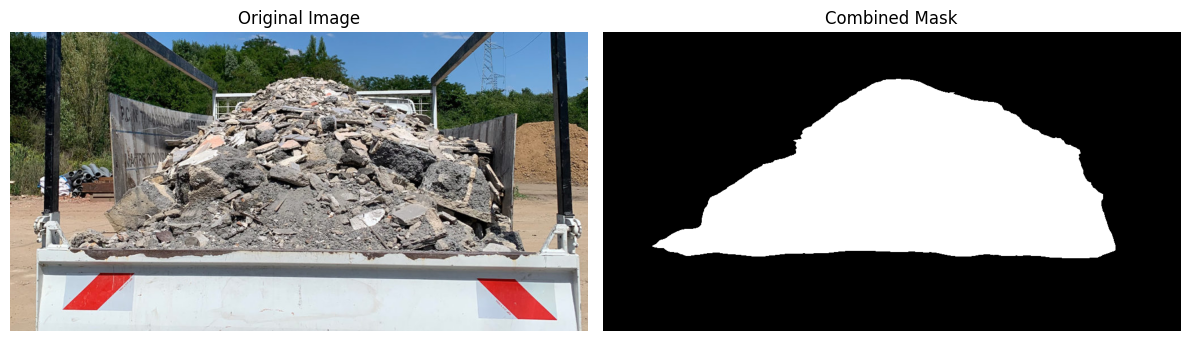

In [22]:
# --- Step 5: Save and Display Combined Mask ---
if combined_mask:
    combined_mask.save("semantic_gravat_mask.png")
    print("\nStep 5: Combined mask saved as 'semantic_gravat_mask.png'.")
    print("Displaying original image and combined mask...")

    # Display original image and mask side by side
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    # Combined Mask
    plt.subplot(1, 2, 2)
    plt.title("Combined Mask")
    plt.imshow(combined_mask, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("\nStep 5: No gravat regions detected.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Step 1: Image loaded successfully.

Step 2: Segmentation completed. Detected labels and masks:
Label: wall, Mask Size: (330, 191)
Label: building, Mask Size: (330, 191)
Label: tree, Mask Size: (330, 191)
Label: person, Mask Size: (330, 191)
Label: plant, Mask Size: (330, 191)
Label: base, Mask Size: (330, 191)
Label: fountain, Mask Size: (330, 191)
Label: sculpture, Mask Size: (330, 191)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Step 3: Similarity scores computed. Scores per detected label:
Detected Label: wall, Max Similarity: 0.4266
Detected Label: building, Max Similarity: 0.4192
Detected Label: tree, Max Similarity: 0.3435
Detected Label: person, Max Similarity: 0.3833
Detected Label: plant, Max Similarity: 0.3366
Detected Label: base, Max Similarity: 0.2971
Detected Label: fountain, Max Similarity: 0.3100
Detected Label: sculpture, Max Similarity: 1.0000

Step 4: Combining masks for similar labels:
Including label: sculpture, Similarity: 1.0000

Step 5: Combined mask saved as 'semantic_gravat_mask.png'.
Displaying original image and combined mask...


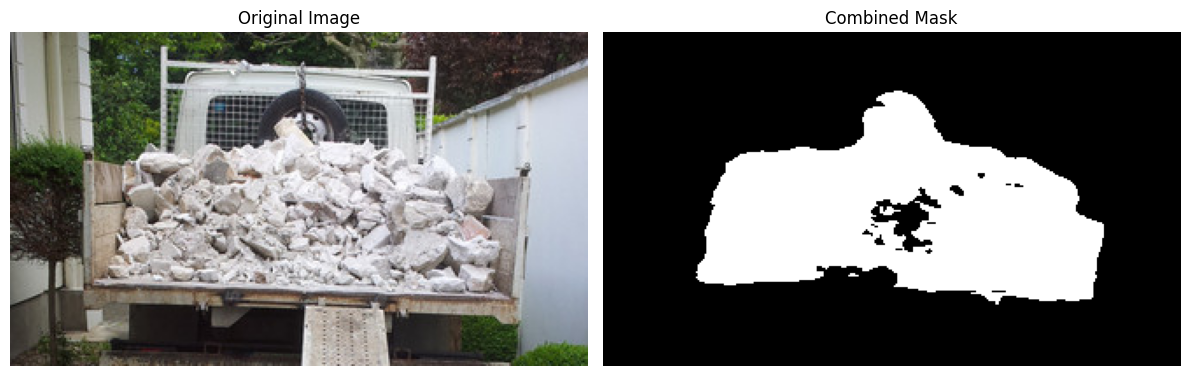

In [32]:
from transformers import pipeline
from PIL import Image, ImageChops
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt

# Load semantic similarity model
similarity_model = SentenceTransformer("all-MiniLM-L6-v2")

# Define a semantic target (what you expect "gravat" to be)
target_labels = ["pile of debris", "rock",  "gravat","sculpture","muger","gravats"]

# Create a segmentation pipeline
device = 0 if torch.cuda.is_available() else -1
segmentation_pipeline = pipeline(
    "image-segmentation",
    model="nvidia/segformer-b0-finetuned-ade-512-512",
    device=device,
)

# --- Step 1: Load Image ---
image_path = "/kaggle/input/gravats/evacuation-gravats.jpg"  # Replace with your image path
image = Image.open(image_path)
print("Step 1: Image loaded successfully.")
image.show()

# --- Step 2: Perform Segmentation ---
result = segmentation_pipeline(image)
print("\nStep 2: Segmentation completed. Detected labels and masks:")
for res in result:
    print(f"Label: {res['label']}, Mask Size: {res['mask'].size}")

detected_labels = [res["label"] for res in result]
detected_masks = [res["mask"] for res in result]

# --- Step 3: Compute Similarity Scores ---
detected_embeddings = similarity_model.encode(detected_labels, convert_to_tensor=True)
target_embeddings = similarity_model.encode(target_labels, convert_to_tensor=True)
similarities = util.cos_sim(target_embeddings, detected_embeddings)

print("\nStep 3: Similarity scores computed. Scores per detected label:")
for i, detected_label in enumerate(detected_labels):
    max_similarity = similarities[:, i].max().item()
    print(f"Detected Label: {detected_label}, Max Similarity: {max_similarity:.4f}")

# --- Step 4: Combine Masks for Similar Labels ---
max_similarities = similarities.max(dim=0)
most_similar_scores = max_similarities.values
most_similar_indices = (most_similar_scores > 0.5).nonzero(as_tuple=True)[0]

combined_mask = None
print("\nStep 4: Combining masks for similar labels:")
for idx in most_similar_indices:
    print(f"Including label: {detected_labels[idx]}, Similarity: {most_similar_scores[idx]:.4f}")
    if combined_mask is None:
        combined_mask = detected_masks[idx]
    else:
        combined_mask = ImageChops.lighter(combined_mask, detected_masks[idx])

# --- Step 5: Save and Display Combined Mask ---
if combined_mask:
    combined_mask.save("semantic_gravat_mask.png")
    print("\nStep 5: Combined mask saved as 'semantic_gravat_mask.png'.")
    print("Displaying original image and combined mask...")

    # Display original image and mask side by side
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    # Combined Mask
    plt.subplot(1, 2, 2)
    plt.title("Combined Mask")
    plt.imshow(combined_mask, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("\nStep 5: No gravat regions detected.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Step 1: Image loaded successfully.

Step 2: Segmentation completed. Detected labels and masks:
Label: wall, Mask Size: (800, 532)
Label: building, Mask Size: (800, 532)
Label: sky, Mask Size: (800, 532)
Label: tree, Mask Size: (800, 532)
Label: earth, Mask Size: (800, 532)
Label: mountain, Mask Size: (800, 532)
Label: car, Mask Size: (800, 532)
Label: rock, Mask Size: (800, 532)
Label: sand, Mask Size: (800, 532)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Step 3: Similarity scores computed. Scores per detected label:
Detected Label: wall, Max Similarity: 0.4266
Detected Label: building, Max Similarity: 0.4192
Detected Label: sky, Max Similarity: 0.3646
Detected Label: tree, Max Similarity: 0.3435
Detected Label: earth, Max Similarity: 0.4424
Detected Label: mountain, Max Similarity: 0.4392
Detected Label: car, Max Similarity: 0.3842
Detected Label: rock, Max Similarity: 1.0000
Detected Label: sand, Max Similarity: 0.5387

Step 4: Combining masks for similar labels:
Including label: rock, Similarity: 1.0000
Including label: sand, Similarity: 0.5387

Step 5: Combined mask saved as 'semantic_gravat_mask.png'.
Displaying original image and combined mask...


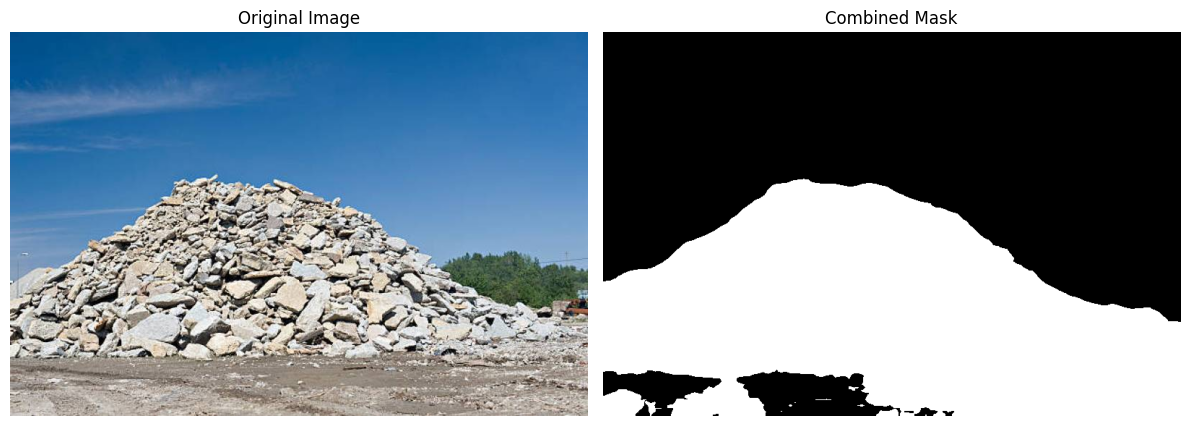

In [34]:
from transformers import pipeline
from PIL import Image, ImageChops
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt

# Load semantic similarity model
similarity_model = SentenceTransformer("all-MiniLM-L6-v2")

# Define a semantic target (what you expect "gravat" to be)
target_labels = ["pile of debris", "rock",  "gravat","sculpture","muger","gravats"]

# Create a segmentation pipeline
device = 0 if torch.cuda.is_available() else -1
segmentation_pipeline = pipeline(
    "image-segmentation",
    model="nvidia/segformer-b0-finetuned-ade-512-512",
    device=device,
)

# --- Step 1: Load Image ---
image_path = "/kaggle/input/gravats/gravats2.jpg" 
image = Image.open(image_path)
print("Step 1: Image loaded successfully.")
image.show()

# --- Step 2: Perform Segmentation ---
result = segmentation_pipeline(image)
print("\nStep 2: Segmentation completed. Detected labels and masks:")
for res in result:
    print(f"Label: {res['label']}, Mask Size: {res['mask'].size}")

detected_labels = [res["label"] for res in result]
detected_masks = [res["mask"] for res in result]

# --- Step 3: Compute Similarity Scores ---
detected_embeddings = similarity_model.encode(detected_labels, convert_to_tensor=True)
target_embeddings = similarity_model.encode(target_labels, convert_to_tensor=True)
similarities = util.cos_sim(target_embeddings, detected_embeddings)

print("\nStep 3: Similarity scores computed. Scores per detected label:")
for i, detected_label in enumerate(detected_labels):
    max_similarity = similarities[:, i].max().item()
    print(f"Detected Label: {detected_label}, Max Similarity: {max_similarity:.4f}")

# --- Step 4: Combine Masks for Similar Labels ---
max_similarities = similarities.max(dim=0)
most_similar_scores = max_similarities.values
most_similar_indices = (most_similar_scores > 0.5).nonzero(as_tuple=True)[0]

combined_mask = None
print("\nStep 4: Combining masks for similar labels:")
for idx in most_similar_indices:
    print(f"Including label: {detected_labels[idx]}, Similarity: {most_similar_scores[idx]:.4f}")
    if combined_mask is None:
        combined_mask = detected_masks[idx]
    else:
        combined_mask = ImageChops.lighter(combined_mask, detected_masks[idx])

# --- Step 5: Save and Display Combined Mask ---
if combined_mask:
    combined_mask.save("semantic_gravat_mask.png")
    print("\nStep 5: Combined mask saved as 'semantic_gravat_mask.png'.")
    print("Displaying original image and combined mask...")

    # Display original image and mask side by side
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    # Combined Mask
    plt.subplot(1, 2, 2)
    plt.title("Combined Mask")
    plt.imshow(combined_mask, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("\nStep 5: No gravat regions detected.")
